In [1]:
from pyidw import idw
from matplotlib import pyplot as plt

In [249]:
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.crs import CRS
from rasterio.transform import from_bounds
import fiona
import numpy as np
from rasterio.enums import Resampling
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
from matplotlib import colors
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from sctriangulate.colors import build_custom_continuous_cmap
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
new_cmap = build_custom_continuous_cmap([255,255,178],[254,204,92],[253,141,60],[240,59,32],[348,100,74])
new_cmap = ListedColormap(["#ffffb2", "#fecc5c", "#fd8d3c", "#f03b20","#bd0026"])
# Define a normalization from values -> colors
norm = colors.BoundaryNorm([0, 0.2, 0.4, 0.6, 0.8,1], 6)

def show_map_5(input_raster='',model="", colormap='coolwarm', image_size=2, return_figure=False):
    with rasterio.open(input_raster) as image_data:
        my_matrix = image_data.read(1)
        my_matrix = np.ma.masked_where(my_matrix == 32767, my_matrix)
        fig, ax = plt.subplots()
        image_hidden = ax.imshow(my_matrix, cmap=new_cmap, norm=norm)
       
        plt.close()

        fig, ax = plt.subplots()
        fig.set_facecolor("w")
        width = fig.get_size_inches()[0] * image_size 
        height = fig.get_size_inches()[1] * image_size
        fig.set_size_inches(w=width, h=height)
        ac = show(image_data, cmap=new_cmap, norm=norm,ax=ax)

       
        
         # Add a legend for labels
        
        legend_labels = {"#ffffb2":"Muy Baja",
                        "#fecc5c": "Baja", 
                        "#fd8d3c": "Media", 
                        "#f03b20": "Alto",
                        "#bd0026": "Muy Alta"}
        patches = [Patch(color=color, label=label)
                for color, label in legend_labels.items()]
        
        ax.legend( handles=patches,
          bbox_to_anchor=(1.3, 1),
          fancybox=True,
          title="Clase",
          facecolor="white",)
       
        cbar = fig.colorbar(image_hidden, ax=ax, pad=0.07,location="bottom",shrink=0.6, label="")
        # ax.set_title("Mapa de Susceptibilidad {}".format(model))
        ax.set_xlabel("Longitud")
        ax.set_ylabel("Latitud")
        cbar.set_label("Susceptibilidad")
        if return_figure == False:
            plt.show()
           
        else:
            return fig, ax, cbar

In [243]:
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.crs import CRS
from rasterio.transform import from_bounds
import fiona
import numpy as np
from rasterio.enums import Resampling
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
from matplotlib import colors
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from sctriangulate.colors import build_custom_continuous_cmap
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
new_cmap = build_custom_continuous_cmap([255,255,178],[254,204,92],[253,141,60],[240,59,32],[348,100,74])
new_cmap = ListedColormap(["#ffffb2",  "#fd8d3c","#bd0026"])
# Define a normalization from values -> colors
norm = colors.BoundaryNorm([0, 0.33, 0.66,1], 4)

def show_map_3(input_raster='',model="", colormap='coolwarm', image_size=2, return_figure=False):
    with rasterio.open(input_raster) as image_data:
        my_matrix = image_data.read(1)
        my_matrix = np.ma.masked_where(my_matrix == 32767, my_matrix)
        fig, ax = plt.subplots()
        image_hidden = ax.imshow(my_matrix, cmap=new_cmap, norm=norm)
       
        plt.close()

        fig, ax = plt.subplots()
        fig.set_facecolor("w")
        width = fig.get_size_inches()[0] * image_size 
        height = fig.get_size_inches()[1] * image_size
        fig.set_size_inches(w=width, h=height)
        ac = show(image_data, cmap=new_cmap, norm=norm,ax=ax)

       
        
         # Add a legend for labels
        
        legend_labels = {"#ffffb2":"Baja",
                        "#fd8d3c": "Media", 
                        "#bd0026": "Alta"}
        patches = [Patch(color=color, label=label)
                for color, label in legend_labels.items()]
        
        ax.legend( handles=patches,
          bbox_to_anchor=(1.3, 1),
          fancybox=True,
          title="Clase",
          facecolor="white",)
       
        cbar = fig.colorbar(image_hidden, ax=ax, pad=0.07,location="bottom",shrink=0.6, label="")
        ax.set_title("Mapa de Susceptibilidad {}".format(model))
        ax.set_xlabel("Longitud")
        ax.set_ylabel("Latitud")
        cbar.set_label("Susceptibilidad")
        if return_figure == False:
            plt.show()
           
        else:
            return fig, ax, cbar

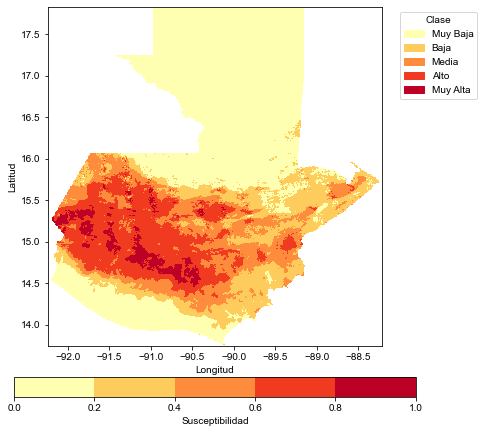

In [267]:
show_map_5('./shapes/shapes_normal/xgboost_suc_clipped.tif',"Support Vector Machine")